In [2]:
from skimage import io
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:

Imagencv2 = cv2.imread(r'D:\Usuario\OneDrive\Escritorio\Uni\Procesamiento digital de Imagenes\YIQ\Astro.jpeg')
ImagenRGBcv2=cv2.cvtColor(Imagencv2,cv2.COLOR_BGR2RGB )
ImagenCIE = ImagenRGBcv2.copy()

## Transformaciones


In [14]:
def RGBaYIQ(imagen):
    T = [[0.299, 0.587, 0.114],
                  [0.59590059, -0.27455667, -0.32134392],
                  [0.21153661, -0.52273617, 0.31119955]]
    ImagenCIE = imagen.copy()/255
    for i in range(len(imagen[0])):
        for j in range(len(imagen[0])):
            ImagenCIE[i,j] = np.dot(T,imagen[i,j]/255)
        
    return ImagenCIE

def YIQaRGB(imagen):
    T = [[0.299, 0.587, 0.114],
                  [0.59590059, -0.27455667, -0.32134392],
                  [0.21153661, -0.52273617, 0.31119955]]
    invT = np.linalg.inv(T)
    ImagenRGB = imagen.copy()/255
    for i in range(len(imagen[0])):
        for j in range(len(imagen[0])):
            ImagenRGB[i,j] = np.dot(invT,imagen[i,j])       
    return ImagenRGB

def modificarYIQ(imagen,Y=1,I=1,Q=1):
    ImagenYIQ= imagen.copy()
    for i in range(len(imagen[0])):
        for j in range(len(imagen[0])):
            ImagenYIQ[i,j][0] = Y*imagen[i,j][0]
            ImagenYIQ[i,j][1] = I*imagen[i,j][1]
            ImagenYIQ[i,j][2] = Q*imagen[i,j][2]
    return ImagenYIQ

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


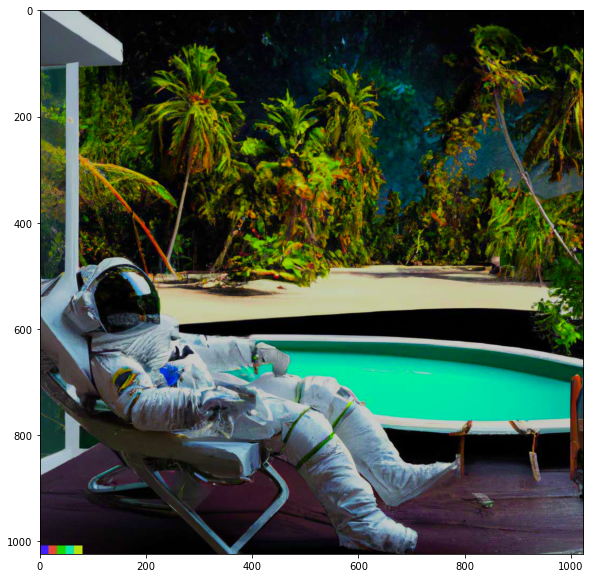

In [21]:
Y = RGBaYIQ(ImagenRGBcv2)
X = modificarYIQ(Y,Y=0.8,I=1,Q=1.6)
im = YIQaRGB(X)
plt.figure(figsize=(10,10))
plt.imshow(im)
